<a href="https://colab.research.google.com/github/Kyvelos/Thesis/blob/main/THESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kyvelos/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 29 (delta 9), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 156.13 KiB | 764.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
!git pull origin main
%ls

fatal: not a git repository (or any of the parent directories): .git
drive/  sample_data/  Thesis/


In [3]:
!pip install SimpleITK pynrrd numpy matplotlib ipywidgets  google.colab pandas > /dev/null 2>&1

In [4]:

import os
import SimpleITK as sitk
import numpy as np
import pandas as pd

# Διαδρομή όπου βρίσκονται οι φάκελοι των ασθενών
base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter"

# Λίστα για αποθήκευση των αποτελεσμάτων
results = []

# Διατρέχουμε τους φακέλους των ασθενών (Patient_1, Patient_2, ..., Patient_20)
for patient_id in range(1, 21):
    patient_folder = os.path.join(base_path, f"Patient {patient_id}")

    # Εύρεση των σωστών αρχείων μέσα στον φάκελο
    segmentation_file = os.path.join(patient_folder, "Segmentation.seg.nrrd")
    image_files = [f for f in os.listdir(patient_folder) if f.endswith(".nrrd") and "No series description" in f]

    if not image_files or not os.path.exists(segmentation_file):
        print(f"❌ Δεν βρέθηκαν τα απαραίτητα αρχεία για Patient_{patient_id}")
        continue

    image_file = os.path.join(patient_folder, image_files[0])

    # Διαβάζουμε τα αρχεία NRRD
    image = sitk.ReadImage(image_file)
    segmentation = sitk.ReadImage(segmentation_file)

    # Μετατροπή σε numpy arrays
    image_array = sitk.GetArrayFromImage(image)  # (Slices, Height, Width)
    segmentation_array = sitk.GetArrayFromImage(segmentation)  # (Slices, Height, Width)

    # Εύρεση slices που περιέχουν segmentation
    slices_with_segmentation = np.where(np.any(segmentation_array > 0, axis=(1,2)))[0]

    # Αποθήκευση των αποτελεσμάτων
    results.append({"Patient": patient_id, "Slices_with_Segmentation": list(slices_with_segmentation)})

    print(f"✔ Patient_{patient_id} -> Slices με segmentation: {slices_with_segmentation}")

# Αποθήκευση αποτελεσμάτων σε CSV
df = pd.DataFrame(results)
df.to_csv("slices_with_segmentation.csv", index=False)

print("✅ Τα αποτελέσματα αποθηκεύτηκαν στο slices_with_segmentation.csv")

✔ Patient_1 -> Slices με segmentation: [ 54  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292

In [5]:
import os
os.listdir()

['.config', 'drive', 'Thesis', 'slices_with_segmentation.csv', 'sample_data']

In [6]:
!mv slices_with_segmentation.csv "/content/drive/My Drive/slices_with_segmentation.csv"



```
 What This Code Does
✅ Loads the patient's medical image & segmentation mask
✅ Extracts the specified slice
✅ Overlays the segmentation mask using transparency
✅ Displays it using Matplotlib

📌 Modify patient_id and slice_index to visualize different slices.
```



In [7]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize a specific slice
def show_slice(patient_id, slice_index):
    base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter"
    patient_folder = f"{base_path}/Patient {patient_id}"

    # Find the correct files
    segmentation_file = f"{patient_folder}/Segmentation.seg.nrrd"

    # Get all available image files
    image_files = [f for f in os.listdir(patient_folder) if f.endswith(".nrrd") and "No series description" in f]

    if not image_files or not os.path.exists(segmentation_file):
        print(f"❌ Files not found for Patient {patient_id}")
        return

    image_file = os.path.join(patient_folder, image_files[0])

    # Read NRRD files
    image = sitk.ReadImage(image_file)
    segmentation = sitk.ReadImage(segmentation_file)

    # Convert to numpy arrays
    image_array = sitk.GetArrayFromImage(image)  # (Slices, Height, Width)
    segmentation_array = sitk.GetArrayFromImage(segmentation)  # (Slices, Height, Width)

    # Check if slice index is valid
    if slice_index < 0 or slice_index >= image_array.shape[0]:
        print(f"❌ Slice {slice_index} is out of bounds (valid range: 0 to {image_array.shape[0]-1})")
        return

    # Show the selected slice
    plt.figure(figsize=(4, 4))
    plt.imshow(image_array[slice_index], cmap="gray")  # Show CT/MRI slice
    plt.imshow(segmentation_array[slice_index], cmap="jet", alpha=0.5)  # Overlay segmentation
    plt.title(f"Patient {patient_id} - Slice {slice_index}")
    plt.axis("off")
    plt.show()

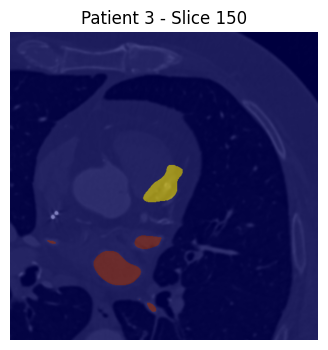

In [8]:
# Example: Show slice 10 for Patient 3
show_slice(patient_id=3, slice_index=150)

🔹 3. Explanation of the Code

✔ Finds and loads the correct .nrrd files for each patient.

✔ Converts images & masks to NumPy arrays.

✔ Normalizes images (scales intensity between 0-255).

✔ Converts masks to binary format (segmented regions → white, background → black).

✔ S images & masks as .png files in train/images/ and train/masks/.






In [9]:
import os
import SimpleITK as sitk
import numpy as np
import cv2
from tqdm import tqdm  # Progress bar
import matplotlib.pyplot as plt

# Paths
base_path = "/content/drive/Othercomputers/Megatron Laptop/Desktop/Thesis_Data/Cardiac Data Greg/Swter"
output_image_dir = "train/images/"
output_mask_dir = "train/masks/"

# Create output directories
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# Loop through all patients
for patient_id in range(1, 21):
    patient_folder = os.path.join(base_path, f"Patient {patient_id}")

    # Find the correct files
    segmentation_file = os.path.join(patient_folder, "Segmentation.seg.nrrd")
    image_files = [f for f in os.listdir(patient_folder) if f.endswith(".nrrd") and "No series description" in f]

    if not image_files or not os.path.exists(segmentation_file):
        print(f"❌ Missing files for Patient {patient_id}, skipping.")
        continue

    image_file = os.path.join(patient_folder, image_files[0])

    # Load NRRD files
    image = sitk.ReadImage(image_file)
    segmentation = sitk.ReadImage(segmentation_file)

    # Convert to numpy arrays
    image_array = sitk.GetArrayFromImage(image)  # (Slices, Height, Width)
    segmentation_array = sitk.GetArrayFromImage(segmentation)  # (Slices, Height, Width)

    # Normalize images (convert to 0-255 for saving as PNG)
    image_array = (image_array - image_array.min()) / (image_array.max() - image_array.min()) * 255
    image_array = image_array.astype(np.uint8)

    # Save slices and masks
    for i in tqdm(range(image_array.shape[0]), desc=f"Processing Patient {patient_id}"):
        img_path = os.path.join(output_image_dir, f"patient{patient_id}_slice{i}.png")
        mask_path = os.path.join(output_mask_dir, f"patient{patient_id}_slice{i}.png")

        # Save images and masks as PNG
        cv2.imwrite(img_path, image_array[i])

        # Convert mask to binary (0 or 255)
mask = segmentation_array[i].astype(np.uint8) * 255

# Ensure mask has the correct shape (H, W) for saving
if len(mask.shape) == 3:  # If mask has extra dimensions, remove them
    mask = mask.squeeze()

# Save the binary mask correctly
cv2.imwrite(mask_path, mask)

print("✅ Data extraction complete. Images and masks saved!")


Processing Patient 20: 100%|██████████| 465/465 [00:03<00:00, 149.44it/s]

✅ Data extraction complete. Images and masks saved!


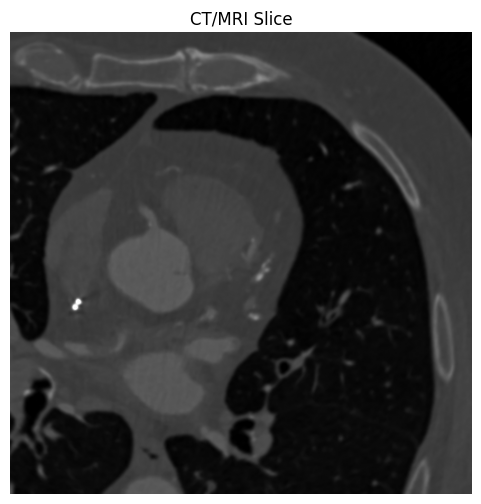

In [10]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = "train/images/patient3_slice147.png"  # Change the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title("CT/MRI Slice")
plt.show()


🔹 What This Code Does

✅ Loads the original CT/MRI slice.

✅ Loads the segmentation mask (binary format).

✅ Applies a color map to the mask (to make segmentation visible).

✅ Overlays the segmentation on the slice with transparency.

✅ Displays the result using Matplotlib.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and mask
image_path = "train/images/patient3_slice147.png"
mask_path = "train/masks/patient3_slice147.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load CT/MRI slice
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load segmentation mask

# Convert mask to binary (0 or 255)
mask = (mask > 0).astype(np.uint8) * 255

# Apply color map to mask (for visualization)
mask_colored = cv2.applyColorMap(mask, cv2.COLORMAP_JET)

# Convert image to BGR (so it can be combined with color mask)
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Overlay the mask onto the original image
overlay = cv2.addWeighted(image_bgr, 0.7, mask_colored, 0.3, 0)

# Display the overlaid image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("CT/MRI Slice with Segmentation Overlay")
plt.show()


TypeError: '>' not supported between instances of 'NoneType' and 'int'

✅ Short Explanation of What This Code Does
This script splits your dataset into train, validation, and test sets, ensuring that only image-mask pairs are included.

🔹 Step-by-Step:

Creates directories for train, val, and test datasets.
Lists all images & masks from train/images/ and train/masks/.
Filters valid image-mask pairs (skips images without masks).
Randomly shuffles the dataset for better generalization.

Splits it into:

70% Train

15% Validation

15% Test

Copies the selected files to the respective directories.

Prints warnings for missing masks instead of crashing.

📌 Final Output:

Your dataset is now structured as:

📂 dataset/train/images/ & dataset/train/masks/

📂 dataset/val/images/ & dataset/val/masks/

📂 dataset/test/images/ & dataset/test/masks/

In [13]:
import os
import shutil
import random

# Paths
image_dir = "train/images/"
mask_dir = "train/masks/"
train_dir = "dataset/train/"
val_dir = "dataset/val/"
test_dir = "dataset/test/"

# Create directories
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(folder, "images"), exist_ok=True)
    os.makedirs(os.path.join(folder, "masks"), exist_ok=True)

# Get all image filenames
all_images = sorted(os.listdir(image_dir))
all_masks = sorted(os.listdir(mask_dir))

# Ensure only image-mask pairs are considered
valid_images = [img for img in all_images if img in all_masks]
missing_masks = [img for img in all_images if img not in all_masks]

if missing_masks:
    print(f"⚠ Warning: {len(missing_masks)} images have no corresponding masks and will be skipped!")

# Shuffle dataset randomly
random.shuffle(valid_images)

# Split dataset
train_split = int(0.7 * len(valid_images))
val_split = int(0.85 * len(valid_images))

train_files = valid_images[:train_split]
val_files = valid_images[train_split:val_split]
test_files = valid_images[val_split:]

# Function to copy files while checking existence
def move_files(file_list, dest_folder):
    for file in file_list:
        img_src = os.path.join(image_dir, file)
        mask_src = os.path.join(mask_dir, file)

        img_dest = os.path.join(dest_folder, "images", file)
        mask_dest = os.path.join(dest_folder, "masks", file)

        if os.path.exists(img_src) and os.path.exists(mask_src):  # Check if both exist
            shutil.copy(img_src, img_dest)
            shutil.copy(mask_src, mask_dest)
        else:
            print(f"⚠ Skipping {file}: Image or mask is missing.")

# Move files to respective folders
move_files(train_files, train_dir)
move_files(val_files, val_dir)
move_files(test_files, test_dir)

print("✅ Dataset split into Train, Validation, and Test sets successfully!")


⚠ Warning: 7511 images have no corresponding masks and will be skipped!
✅ Dataset split into Train, Validation, and Test sets successfully!


In [14]:
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

🔹 3. Explanation of the Code

✔ Loads images and masks from directories (dataset/train/images/, etc.).

✔ Converts images to grayscale (L) → Ensures consistency.

✔ Applies PyTorch transformations → Converts to tensors.

✔ Creates DataLoaders for efficient batch processing.

In [21]:

image_dir = "train/images"
mask_dir = "train/masks"

print("Number of images:", len(os.listdir(image_dir)))
print("Number of masks:", len(os.listdir(mask_dir)))

# Show a few files to check if they exist
print("Sample images:", os.listdir(image_dir)[:5])
print("Sample masks:", os.listdir(mask_dir)[:5])

Number of images: 7512
Number of masks: 1
Sample images: ['patient7_slice373.png', 'patient14_slice166.png', 'patient20_slice425.png', 'patient10_slice188.png', 'patient17_slice50.png']
Sample masks: ['patient20_slice464.png']


In [22]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define the PyTorch Dataset Class
class HeartSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))  # Ensure sorted order

    def __len__(self):
        return len(self.images)  # Number of images

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx])  # Mask should have same filename

        # Open images in grayscale mode
        image = Image.open(img_path).convert("L")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask  # Return image-mask pair

# Define Transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor (automatically normalizes to [0,1])
])

# Create Dataset Objects
train_dataset = HeartSegmentationDataset("train/images", "train/masks", transform=transform)
val_dataset = HeartSegmentationDataset("val/images", "val/masks", transform=transform)
test_dataset = HeartSegmentationDataset("test/images", "test/masks", transform=transform)

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("✅ Dataset successfully loaded into PyTorch!")


FileNotFoundError: [Errno 2] No such file or directory: 'val/images'

In [ ]:
import matplotlib.pyplot as plt

# Get a sample batch from train_loader
sample_images, sample_masks = next(iter(train_loader))

# Convert tensors back to numpy for visualization
sample_image = sample_images[0].squeeze().numpy()  # Remove batch dimension
sample_mask = sample_masks[0].squeeze().numpy()

# Display the sample
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap="gray")
plt.title("CT/MRI Slice")

plt.subplot(1, 2, 2)
plt.imshow(sample_mask, cmap="gray")
plt.title("Segmentation Mask")

plt.show()


In [ ]:
import os
from PIL import Image

image_dir = "dataset/train/images/"
image_sizes = []

# Loop through a few images and check their sizes
for img_name in os.listdir(image_dir)[:10]:  # Check first 10 images
    img_path = os.path.join(image_dir, img_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Print unique sizes
print("Unique image sizes:", set(image_sizes))


In [ ]:
!pip install torch torchvision segmentation-models-pytorch


✅ Explanation of the U-Net Implementation

1️⃣ We define a U-Net model using segmentation-models-pytorch, with ResNet34 as the backbone.

Input: 1-channel grayscale CT/MRI image.

Output: 1-channel segmentation mask (binary classification).

2️⃣ We use a combination of loss functions:

Binary Cross Entropy (BCE) → Helps classify each pixel.

Dice Loss → Measures overlap between predicted & actual segmentation.

Combined Loss = BCE + Dice Loss → Ensures accurate segmentation.

3️⃣ We use the Adam optimizer to update model weights efficiently.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import segmentation_models_pytorch as smp  # Prebuilt U-Net

# Define U-Net Model
class UNetModel(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNetModel, self).__init__()
        self.model = smp.Unet(
            encoder_name="resnet34",  # Backbone for feature extraction
            encoder_weights="imagenet",  # Pretrained weights
            in_channels=in_channels,  # Input channels (1 for grayscale)
            classes=out_channels,  # Output classes (1 for binary segmentation)
        )

    def forward(self, x):
        return self.model(x)

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetModel().to(device)

# Print model architecture
print(model)


In [ ]:
# Loss Functions
def dice_loss(pred, target, smooth=1.):
    pred = torch.sigmoid(pred)  # Apply sigmoid to convert logits to probability
    intersection = (pred * target).sum()
    return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

bce_loss = nn.BCEWithLogitsLoss()  # BCE loss

# Combined Loss (BCE + Dice)
def combined_loss(pred, target):
    return bce_loss(pred, target) + dice_loss(pred, target)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

print("✅ Loss function and optimizer set up!")


In [ ]:
# Prevent Colab from disconnecting
from IPython.display import display, Javascript
display(Javascript('''
    function keepAlive() {
        setInterval(() => { console.log("Keeping Colab Alive"); }, 60000);
    }
    keepAlive();
'''))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # Progress bar

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Training Function
def train_model(model, train_loader, val_loader, epochs=10, lr=0.0001):
    # Move model to GPU/CPU
    model = model.to(device)

    # Loss function (BCE + Dice Loss)
    def dice_loss(pred, target, smooth=1.):
        pred = torch.sigmoid(pred)  # Convert logits to probability
        intersection = (pred * target).sum()
        return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

    bce_loss = nn.BCEWithLogitsLoss()

    def combined_loss(pred, target):
        return bce_loss(pred, target) + dice_loss(pred, target)

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float("inf")

    # Training Loop
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]"):
            images, masks = images.to(device), masks.to(device)  # Move to GPU if available

            optimizer.zero_grad()  # Reset gradients

            outputs = model(images)  # Forward pass
            loss = combined_loss(outputs, masks)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)

        # Validation Step
        model.eval()
        val_loss = 0
        with torch.no_grad():  # No gradient calculation in validation
            for images, masks in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]"):
                images, masks = images.to(device), masks.to(device)

                outputs = model(images)
                loss = combined_loss(outputs, masks)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        print(f"🔹 Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), "best_unet_model.pth")
            print("✅ Best model saved!")

    print("🎯 Training Complete!")

# Start Training
train_model(model, train_loader, val_loader, epochs=10, lr=0.0001)


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import time
import segmentation_models_pytorch as smp

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Reduce model complexity (Use mobilenet_v2 instead of resnet34)
class UNetModel(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNetModel, self).__init__()
        self.model = smp.Unet(
            encoder_name="mobilenet_v2",  # Lighter backbone
            encoder_weights="imagenet",
            in_channels=in_channels,
            classes=out_channels,
        )

    def forward(self, x):
        return self.model(x)

# Initialize Model
model = UNetModel().to(device)

# Loss Functions
def dice_loss(pred, target, smooth=1.):
    pred = torch.sigmoid(pred)  # Convert logits to probability
    intersection = (pred * target).sum()
    return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

bce_loss = nn.BCEWithLogitsLoss()

def combined_loss(pred, target):
    return bce_loss(pred, target) + dice_loss(pred, target)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Increased LR for faster convergence

# Mixed Precision Training (for speed)
scaler = torch.cuda.amp.GradScaler()

# Training Function
def train_model(model, train_loader, val_loader, epochs=5, grad_accumulation=2):
    best_val_loss = float("inf")

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        start_time = time.time()

        # Training Loop
        for i, (images, masks) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]")):
            images, masks = images.to(device), masks.to(device)

            optimizer.zero_grad()

            # Mixed Precision Training
            with torch.cuda.amp.autocast():
                outputs = model(images)
                loss = combined_loss(outputs, masks) / grad_accumulation  # Normalize loss

            scaler.scale(loss).backward()

            # Update weights after every grad_accumulation steps
            if (i + 1) % grad_accumulation == 0 or (i + 1) == len(train_loader):
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            train_loss += loss.item() * grad_accumulation  # Re-scale loss

        avg_train_loss = train_loss / len(train_loader)
        elapsed_time = time.time() - start_time

        # Validation Step
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]"):
                images, masks = images.to(device)
                outputs = model(images)
                loss = combined_loss(outputs, masks)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        print(f"🔹 Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f} (Time: {elapsed_time:.2f}s)")

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), "best_unet_model.pth")
            print("✅ Best model saved!")

    print("🎯 Training Complete!")

# Run Training
train_model(model, train_loader, val_loader, epochs=5, grad_accumulation=2)


ModuleNotFoundError: No module named 'segmentation_models_pytorch'